In [1]:
import json
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import cmp_to_key

sns.set_theme(font='Fira Code', font_scale=0.8, style='whitegrid')
sns.set_style({'grid.linestyle': ':'})

In [2]:
def get_filename(crawl, climb, size, mass, count):
    return f'../data/crawl_{crawl}_climb_{climb}_size_{size}_mass_{mass}_cnt_{count}.json';

In [3]:
crawl, climb, size, mass, count = '0.2', '0.2', '0', '0', 100
filename = get_filename(crawl, climb, size, mass, count)
with open(filename, 'r') as file:
        data = json.load(file)
points = data['points']

In [4]:
def equal(a, b):
    return a['x'] == b['x'] and a['y'] == b['y']

In [5]:
def orientation(a, b, c):
    v = a['x']*(b['y']-c['y']) + b['x']*(c['y']-a['y']) + c['x']*(a['y']-b['y'])
    if v < 0:
        return -1
    if v > 0:
        return 1
    return 0;

In [6]:
def cw(a, b, c):
    return orientation(a, b, c) < 0

In [7]:
def convex_hull(a):
    p0 = a[0]
    
    for pt in a:
        if pt['y'] > p0['y']:
            continue;
        if pt['y'] == p0['y']:
            p0['x'] = min(p0['x'], pt['x'])
        else:
            p0 = pt
            
    def compare(a, b):
        o = orientation(p0, a, b)
        if o == 0:
            l = (p0['x']-a['x'])*(p0['x']-a['x']) + (p0['y']-a['y'])*(p0['y']-a['y'])
            r = (p0['x']-b['x'])*(p0['x']-b['x']) + (p0['y']-b['y'])*(p0['y']-b['y'])
            return l - r
        return -1 if o < 0 else 1
        
    a = sorted(a, key=cmp_to_key(compare))
    st = []
    
    for pt in a:
        while len(st) >= 2 and not cw(st[-2], st[-1], pt):
            st.pop()
        st.append(pt)
        
    if len(st) == 2 and st[0] == st[1]:
        st.pop()
        
    return st[::]

In [8]:
def display_ch(points):
    ch_points = convex_hull(points)
    
    y_thresh = 20
    
    min_x = min(point['x'] for point in data['points'] if point['y'] < y_thresh)
    max_x = max(point['x'] for point in data['points'] if point['y'] < y_thresh)
    
    ch_points = list(filter(lambda pt: pt['y'] >= y_thresh or pt['x'] <= min_x or pt['x'] >= max_x, ch_points))

    rows = []

    max_x = max([point['x'] for point in data['points']])
    min_x = min([point['x'] for point in data['points']])
    
    halved = (max_x + min_x) / 2
    
    for i in range(len(points)):
        on_hull = False
        if points[i] in ch_points:
            on_hull = True
        rows.append([points[i]['x']-halved, -points[i]['y'], 'Yes' if on_hull else 'No'])
        
    df = pd.DataFrame(rows, columns=['x', 'y', 'On Hull'])
    
    rows = [];
    
    for i in range(len(ch_points)):
        rows.append([ch_points[i]['x']-halved, -ch_points[i]['y'], 'Yes'])
    
    df_hull = pd.DataFrame(rows, columns=['x', 'y', 'On Hull'])

    palette_duo = ["#878c2a", "#e8edbf"]

    first_no = df['On Hull'][0] == 'No'
    
    if first_no:
        palette_duo = palette_duo[::-1]
    
    plt.figure(figsize=(6, 4))
    ax = sns.scatterplot(x='x', y='y', data=df, hue='On Hull', palette=palette_duo, legend=False, alpha=0.8, size=4)
    sns.lineplot(x='x', y='y', data=df_hull, c=palette_duo[1] if first_no else palette_duo[0], alpha=0.8, size=4, linestyle='--', legend=False, sort=False)
    
    ax.set_xlim([-500, 500])
    ax.set_ylim([-666, 0])
    
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    
    plt.show()

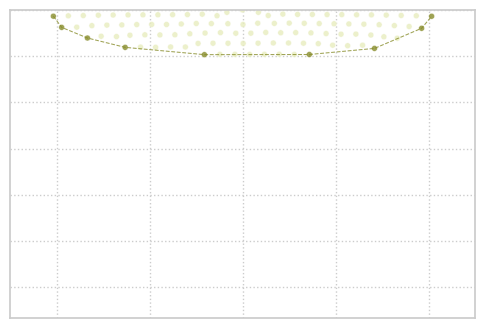

In [9]:
crawl, climb, size, mass, count = '0.2', '0.2', '0', '0', 100
filename = get_filename(crawl, climb, size, mass, count)
with open(filename, 'r') as file:
        data = json.load(file)
points = data['points']
display_ch(points)

### **Timelapse...**

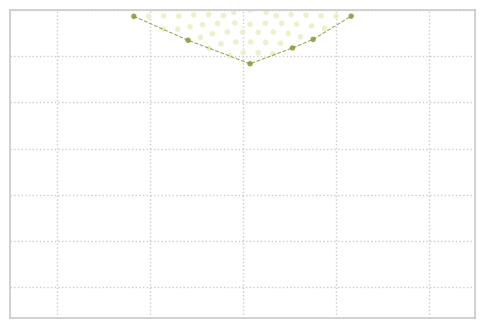

In [10]:
crawl, climb, size, mass, count = '0.4', '0.4', '0', '0', 50
filename = get_filename(crawl, climb, size, mass, count)
with open(filename, 'r') as file:
    data = json.load(file)
points = data['points']
display_ch(points)

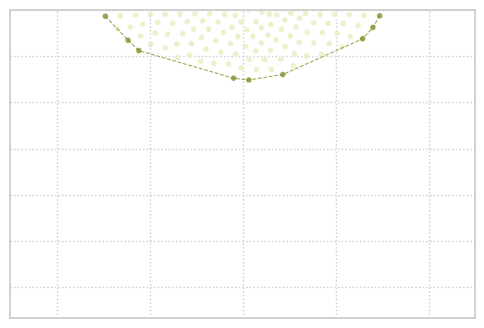

In [11]:
crawl, climb, size, mass, count = '0.4', '0.4', '0', '0', 100
filename = get_filename(crawl, climb, size, mass, count)
with open(filename, 'r') as file:
    data = json.load(file)
points = data['points']
display_ch(points)

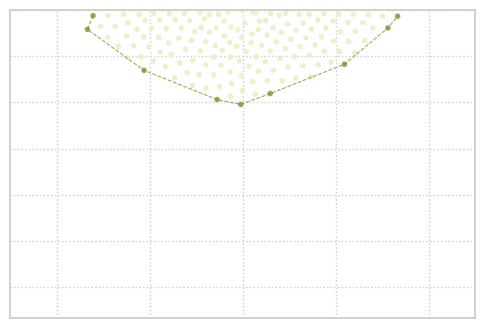

In [12]:
crawl, climb, size, mass, count = '0.4', '0.4', '0', '0', 150
filename = get_filename(crawl, climb, size, mass, count)
with open(filename, 'r') as file:
    data = json.load(file)
points = data['points']
display_ch(points)

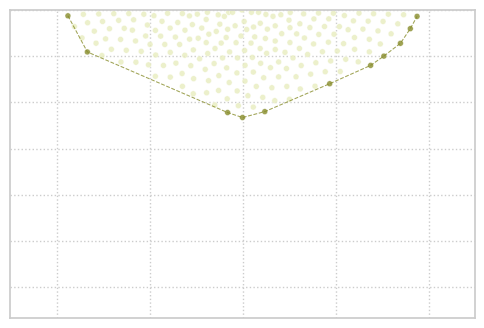

In [13]:
crawl, climb, size, mass, count = '0.4', '0.4', '0', '0', 200
filename = get_filename(crawl, climb, size, mass, count)
with open(filename, 'r') as file:
    data = json.load(file)
points = data['points']
display_ch(points)

In [14]:
crawl, climb, size, mass, count = '0.4', '0.4', '0', '0', 200
filename = get_filename(crawl, climb, size, mass, str(count)+'(1)')
with open(filename, 'r') as file:
    data = json.load(file)
points = data['points']
display_ch(points)

FileNotFoundError: [Errno 2] No such file or directory: '../data/crawl_0.4_climb_0.4_size_0_mass_0_cnt_200(1).json'

In [ ]:
crawl, climb, size, mass, count = '0.4', '0.4', '0', '0', 200
filename = get_filename(crawl, climb, size, mass, str(count)+'(2)')
with open(filename, 'r') as file:
    data = json.load(file)
points = data['points']
display_ch(points)

In [ ]:
crawl, climb, size, mass, count = '0.4', '0.4', '0', '0', 200
filename = get_filename(crawl, climb, size, mass, str(count)+'(3)')
with open(filename, 'r') as file:
    data = json.load(file)
points = data['points']
display_ch(points)

In [ ]:
crawl, climb, size, mass, count = '0.4', '0.4', '0', '0', 200
filename = get_filename(crawl, climb, size, mass, str(count)+'(4)')
with open(filename, 'r') as file:
    data = json.load(file)
points = data['points']
display_ch(points)

### **Gallery**

crawl: 0, climb 0


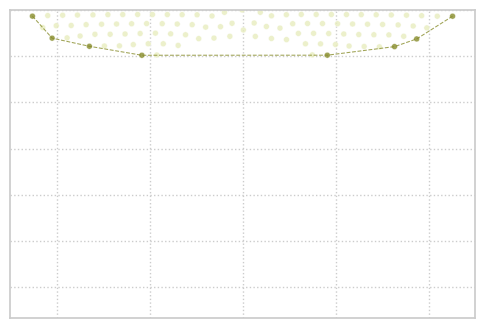

crawl: 0, climb 0.2


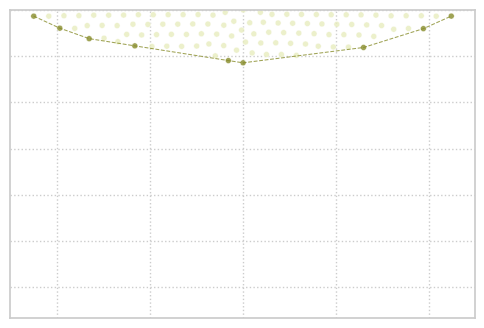

crawl: 0, climb 0.4


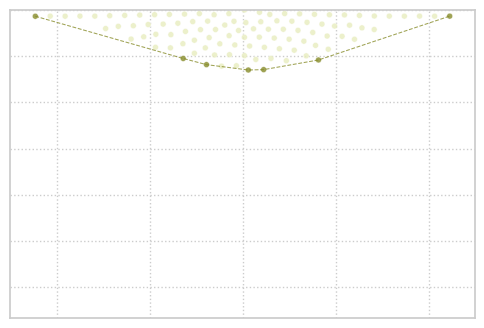

crawl: 0, climb 0.6


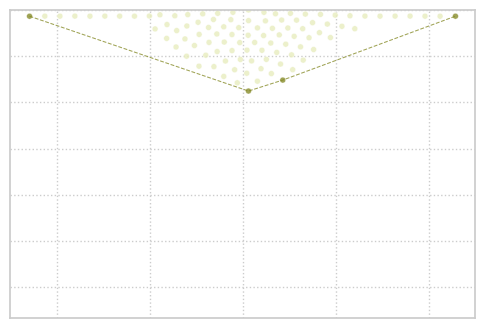

crawl: 0, climb 0.8


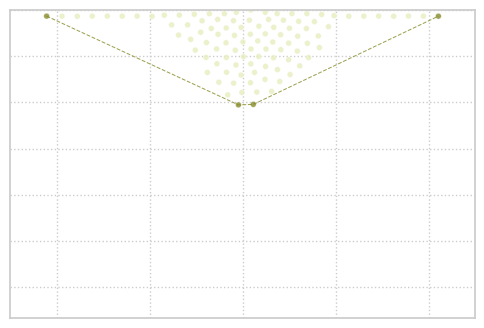

crawl: 0, climb 1


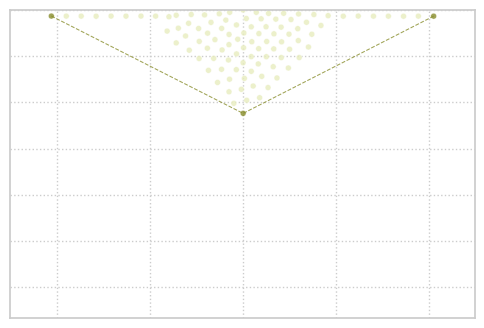

crawl: 0.2, climb 0


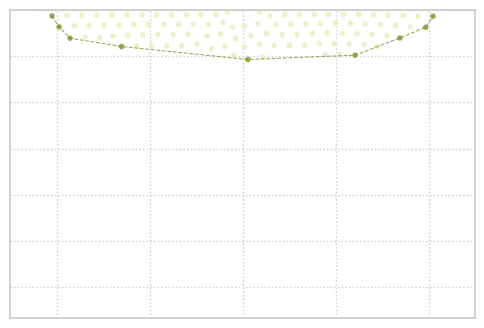

crawl: 0.2, climb 0.2


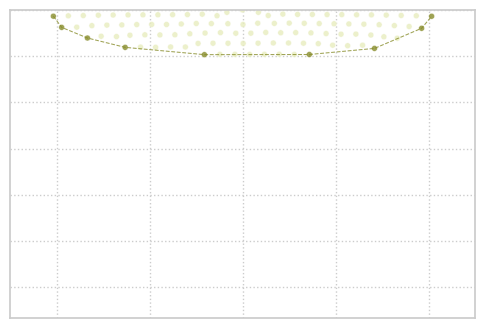

crawl: 0.2, climb 0.4


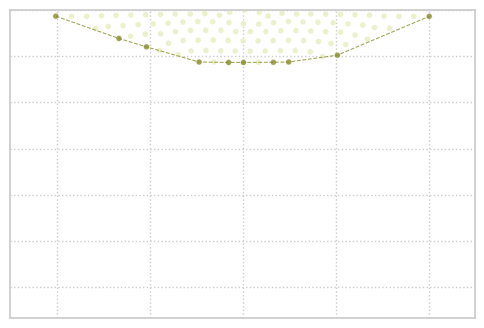

crawl: 0.2, climb 0.6


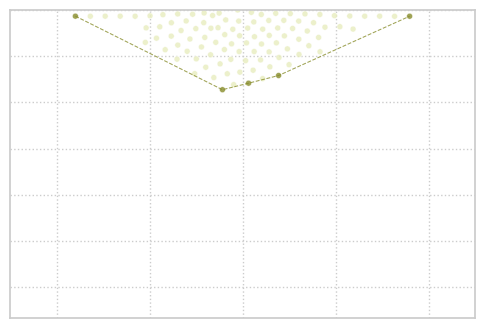

crawl: 0.2, climb 0.8


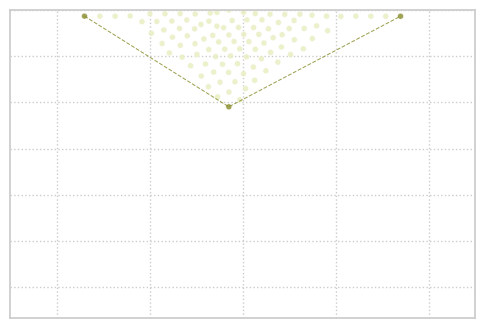

crawl: 0.2, climb 1


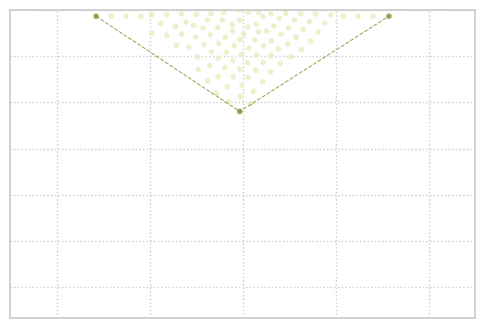

crawl: 0.4, climb 0


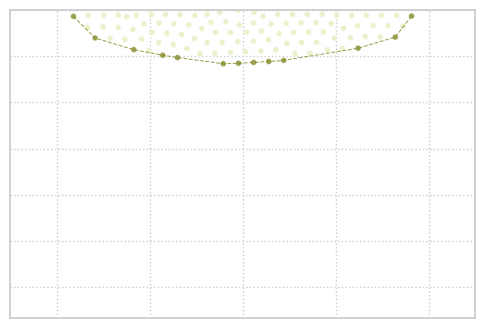

crawl: 0.4, climb 0.2


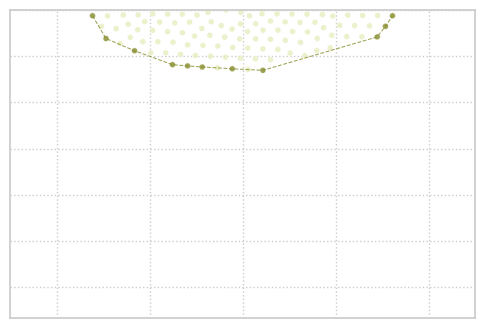

crawl: 0.4, climb 0.4


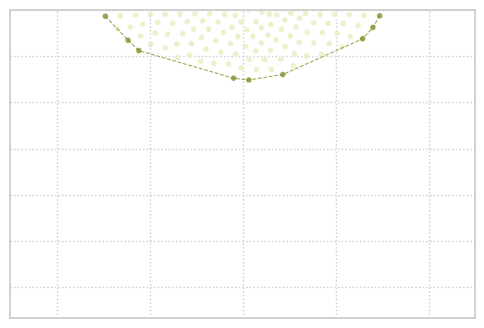

crawl: 0.4, climb 0.6


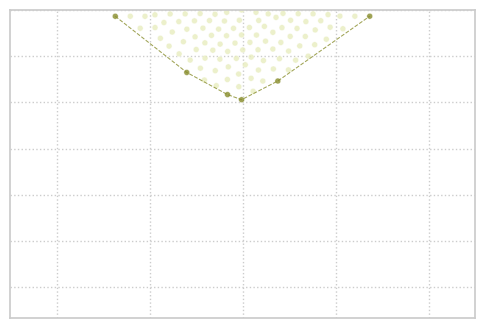

crawl: 0.4, climb 0.8


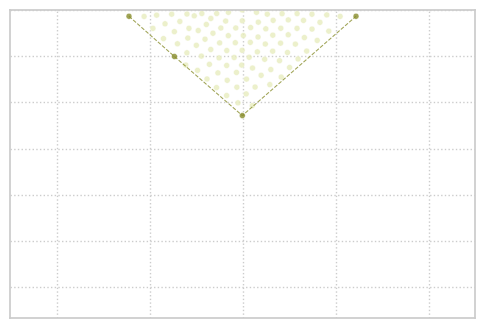

crawl: 0.4, climb 1


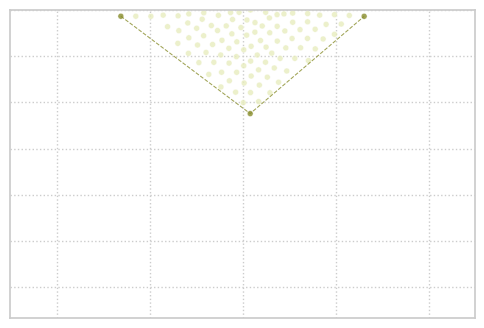

crawl: 0.6, climb 0


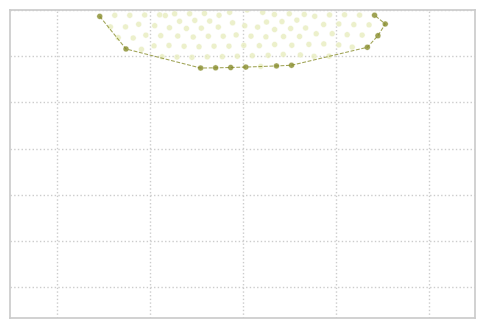

crawl: 0.6, climb 0.2


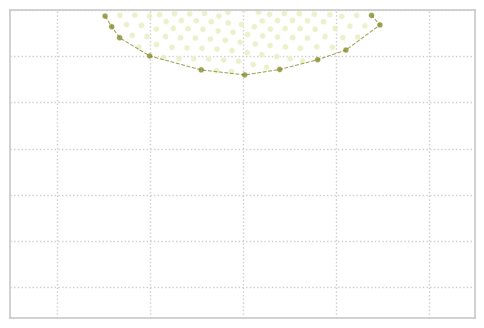

crawl: 0.6, climb 0.4


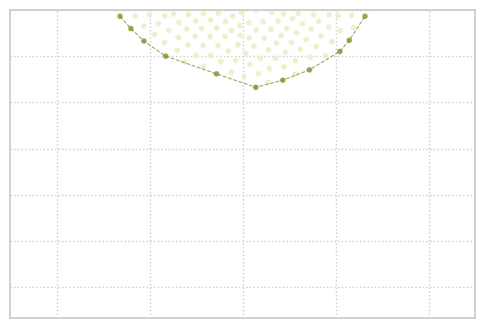

crawl: 0.6, climb 0.6


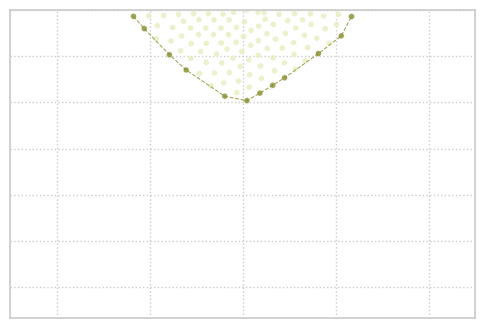

crawl: 0.6, climb 0.8


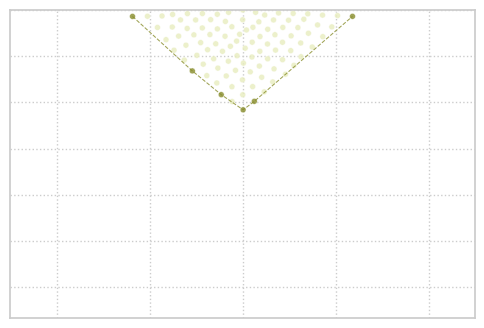

crawl: 0.6, climb 1


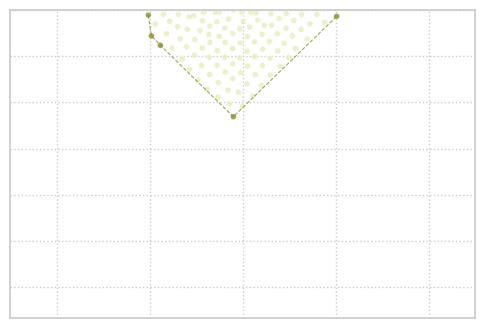

crawl: 0.8, climb 0


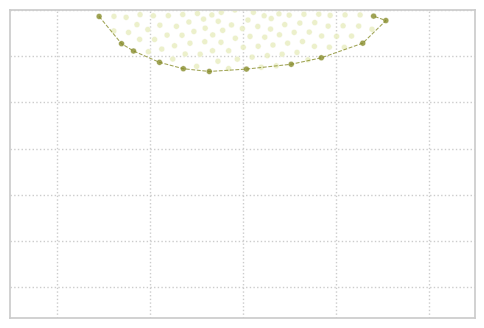

crawl: 0.8, climb 0.2


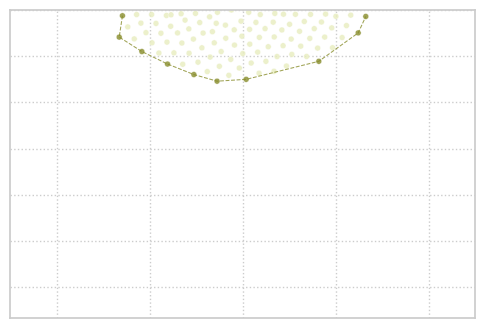

crawl: 0.8, climb 0.4


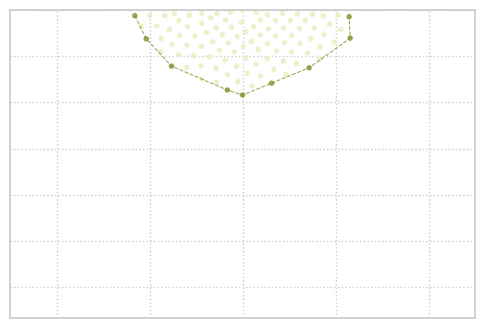

crawl: 0.8, climb 0.6


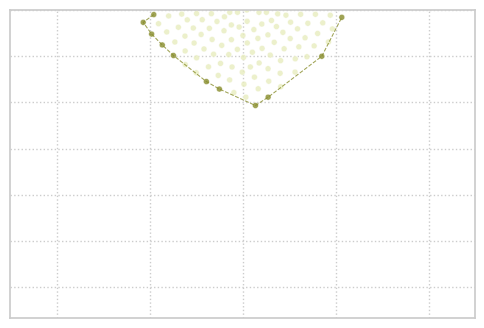

crawl: 0.8, climb 0.8


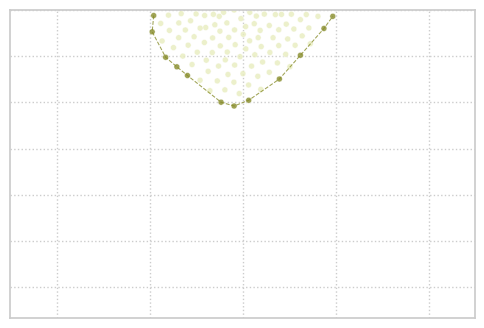

crawl: 0.8, climb 1


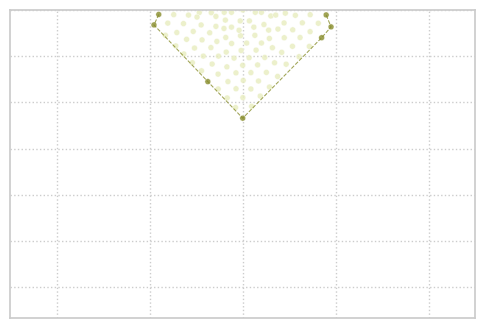

crawl: 1, climb 0


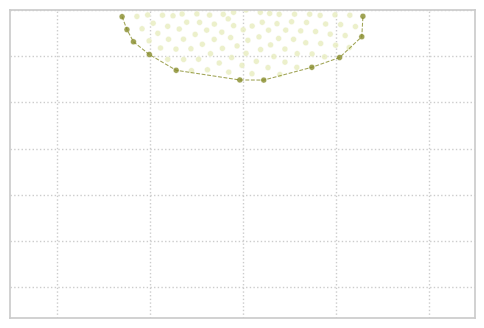

crawl: 1, climb 0.2


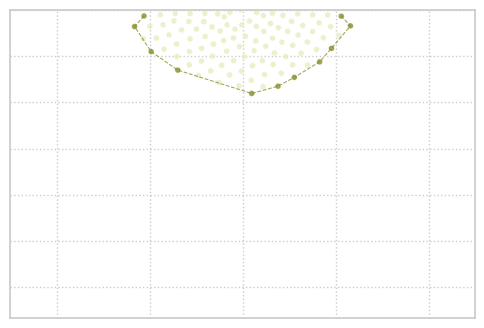

crawl: 1, climb 0.4


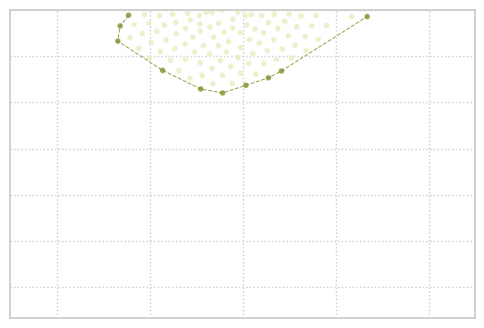

crawl: 1, climb 0.6


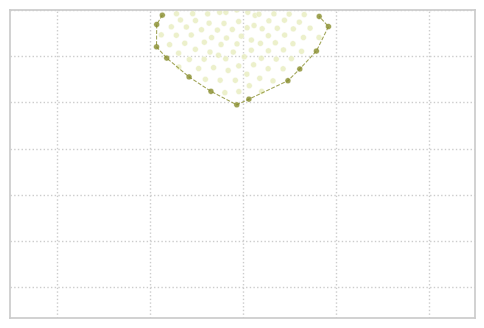

crawl: 1, climb 0.8


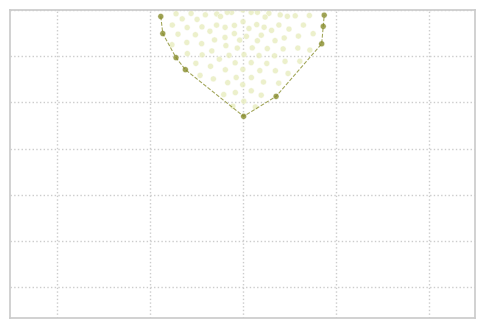

crawl: 1, climb 1


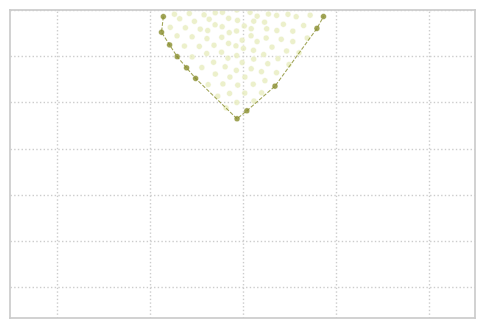

In [15]:
count, size, mass = '100', '0', '0'
crawls = ['0', '0.2', '0.4', '0.6', '0.8', '1']
climbs = ['0', '0.2', '0.4', '0.6', '0.8', '1']
for crawl in crawls:
    for climb in climbs:
        filename = get_filename(crawl, climb, size, mass, count)
        with open(filename, 'r') as file:
            data = json.load(file)
        points = data['points']
        print(f'crawl: {crawl}, climb {climb}')
        display_ch(points)